# EART 70013  <a class="tocSkip">
    
# Geophysical Inversion <a class="tocSkip">    
    
## Lecture 4 - Homework solutions <a class="tocSkip">  

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Row-operations-on-an-over-determined-problem" data-toc-modified-id="Homework---Row-operations-on-an-over-determined-problem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Row operations on an over-determined problem</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---An-over-determined-system-with-(by-construction)-an-exact-solution" data-toc-modified-id="Homework---An-over-determined-system-with-(by-construction)-an-exact-solution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - An over-determined system with (by construction) an exact solution</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Least-squares-solution-as-a-compromise-between-all-constraints" data-toc-modified-id="Homework---Least-squares-solution-as-a-compromise-between-all-constraints-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Least squares solution as a compromise between all constraints</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---An-even-simpler-over-determined-case" data-toc-modified-id="Homework---An-even-simpler-over-determined-case-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - An even simpler over-determined case</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Outer-product" data-toc-modified-id="Homework---Outer-product-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Outer-product</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Matrix-rank-and-RREF-(a-non-square-case)" data-toc-modified-id="Homework---Matrix-rank-and-RREF-(a-non-square-case)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Matrix rank and RREF (a non-square case)</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Minimal-norm-solution-to-under-determined-problem" data-toc-modified-id="Homework---Minimal-norm-solution-to-under-determined-problem-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Minimal-norm solution to under-determined problem</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

# Homework

## Homework - Row operations on an over-determined problem

Consider the following example from the lecture

$$
\begin{align*}
  2x + 3y &= 7 \\[5pt]
   x - 4y &= 3 \\[5pt]
  -3x - 10y & = -11
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 & 3 \\
    1 & -4  \\
    -3 & -10 
  \end{pmatrix}
  \begin{pmatrix}
    x \\
    y 
  \end{pmatrix}=
  \begin{pmatrix}
    7 \\
    3 \\
    -11
  \end{pmatrix}   
$$

Use row operations on the augmented system in an attempt to solve this problem.

<br>

In doing this you will be able to also establish the rank of $A$ and the rank of the augmented matrix.

What relationship do you need between these two values in order for the problem to have a solution?

Can you think of an example where this wouldn't be the case and you have a system without an exact solution?

### Solution

For the augmented system

$$
[A \, | \, \boldsymbol{b}] = 
\left[
  \begin{array}{rr|r}
    2 & 3 & 7\\
    1 & -4 & 3 \\
    -3 & -10 & -11 
  \end{array}
\right]
$$

Swap rows as an easy way to get a "1" top left

$$
\left[
  \begin{array}{rr|r}
    1 & -4 & 3 \\
    2 & 3 & 7\\
    -3 & -10 & -11 
  \end{array}
\right]
$$

use the "1" to set the values below to "0"

$$
\left[
  \begin{array}{rr|r}
    1 & -4 & 3 \\
    0 & 11 & 1\\
    0 & -22 & -2 
  \end{array}
\right]
$$

Now scale a row to get a "1" as the leading entry of the next row

$$
\left[
  \begin{array}{rr|r}
    1 & -4 & 3 \\
    0 & 1 & 1/11\\
    0 & -1 & -1/11 
  \end{array}
\right]
$$

use if to set entries above and below to zero

$$
\left[
  \begin{array}{rr|r}
    1 & 0 & 3+4/11 \\
    0 & 1 & 1/11\\
    0 & 0 & 0 
  \end{array}
\right]
$$

and so this problem has the unique solution $ x = 3+4/11 = 37/11$ and $y = 1/11$.

Key here was that $\text{rank}([A|\boldsymbol{b}]) = \text{rank}(A)$.


<br>

What would have been the outcome if we ended up with the final form

$$
\left[
  \begin{array}{rr|r}
    1 & 0 & 3+4/11 \\
    0 & 1 & 1/11\\
    0 & 0 & 1 
  \end{array}
\right]
$$

i.e. a situation where $\text{rank}([A|\boldsymbol{b}]) > \text{rank}(A)$?

Our system would have had no solution as the three equations would have been inconsistent.

## Homework - An over-determined system with (by construction) an exact solution

Recall the simple over-determined problem from the lecture

`A = np.array([[2, 3], [1, -4], [1, 10]])`

You were asked to think about how you could change the RHS vector only in order to come up with a version of the over-determined problem that has an exact solution. You were given the hint to think about the range of the LHS matrix $A$

### Solution

All we need to do is ensure that the RHS vector is in the range of $A$. If it is then we can take an appropriate weighted sum of the columns in order to reach that point, these weights in turn are the solution to the problem $\boldsymbol{x}$.

As an example let's just take $\boldsymbol{b}$ to be the sum of the columns.

If our argument is right the three lines visualising the three equations/constriants should all coincide at a single location, e.g here that should be at the location $\boldsymbol{x} = (1,1)^T$.

Let's plot this situation to check

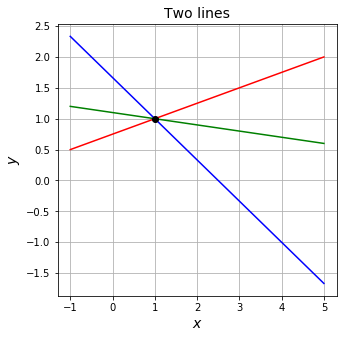

In [2]:
A = np.array([[2, 3], [1, -4], [1, 10]])


# take b to be the sum of the two columns of A
b = A[:,0] + A[:,1]

# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ b

# plot the three lines
x = np.linspace(-1,5,100)

y1 = -(2./3.)*x + (b[0]/3.)
y2 = (1./4.)*x - (b[1]/4.)
y3 = -(1./10.)*x + (b[2]/10.)

fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Two lines', fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b')
ax1.plot(x,y2,'r')
ax1.plot(x,y3,'g')

# plot what we hope should be the solution
ax1.plot(1, 1, 'ko')


## Homework - Least squares solution as a compromise between all constraints

At the end of the lecture we showed an example and noted that the least squares solution was attempting to satisfy all three constraint equations, and that the specific value found was the one which minimised $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$.

By perturbing the values of the obtained least squares solution, show that it is indeed the case that these lead to $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$ growing.

### Solution

[[ 2  1  1]
 [ 3 -4 10]] [ 7  3 -1]
array([16, -1])
[[ 2  1]
 [ 3 -4]] [7 3]
array([17,  9])
[[ 2  1]
 [ 3 10]] [ 7 -1]
array([13, 11])
[[ 1  1]
 [-4 10]] [ 3 -1]
array([  2, -22])


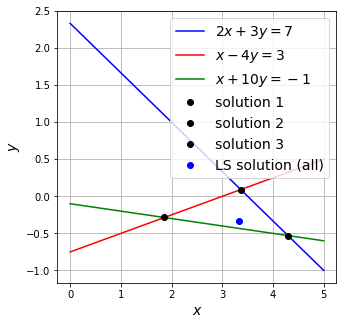

In [3]:
A = np.array([[2, 3], [1, -4], [1, 10]])
b = np.array([7,3,-1])

def ls_solution(A,b):
    ATA = A.T @ A  
    # Form the RHS vector:
    print(A.T,b)
    rhs = A.T @ b.T
    pprint(rhs)
    # solve the system
    return sl.solve(ATA, rhs)

# solve our 3x2 problem using LS
ls_sol = ls_solution(A, b)
# solve the three individual 2x2 problems - can still use the LS code
ls_sol1 = ls_solution(A[ [0,1] ,: ], b[ [0,1] ])
ls_sol2 = ls_solution(A[ [0,2] ,: ], b[ [0,2] ])
ls_sol3 = ls_solution(A[ [1,2] ,: ], b[ [1,2] ])

# plot this solution to see where it lies
x = np.linspace(0,5,100)

y1 = -(2./3.)*x + (7./3.)
y2 = (1./4.)*x - (3./4.)
y3 = -(1./10.)*x - (1./10.)


fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.grid(True)

ax1.plot(x,y1,'b', label='$2x+3y=7$')
ax1.plot(x,y2,'r', label='$x-4y=3$')
ax1.plot(x,y3,'g', label='$x+10y=-1$')
ax1.plot(ls_sol1[0], ls_sol1[1], 'ko', label='solution 1')
ax1.plot(ls_sol2[0], ls_sol2[1], 'ko', label='solution 2')
ax1.plot(ls_sol3[0], ls_sol3[1], 'ko', label='solution 3')
ax1.plot(ls_sol[0], ls_sol[1], 'bo', label='LS solution (all)')

ax1.legend(loc='best', fontsize=14)

[[ 2  1  1]
 [ 3 -4 10]] [ 7  3 -1]
array([16, -1])
[[ 2  1  1]
 [ 3 -4 10]] [ 7  3 -1]
array([16, -1])


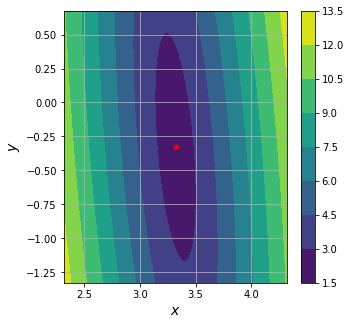

In [4]:
A = np.array([[2, 3], [1, -4], [1, 10]])
b = np.array([7,3,-1])

# solve our 3x2 problem using LS
ls_sol = ls_solution(A, b)

# construct a grid of points in (x,y) around this solution location 
pert = 1.
# construct a mesh
# 100 points spread either side of ls_sol, of extent pert
x = np.linspace(ls_sol[0] - pert, ls_sol[0] + pert, 100)
y = np.linspace(ls_sol[1] - pert, ls_sol[1] + pert, 100)
errors = np.zeros([len(x), len(y)])
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        errors[i,j] = np.linalg.norm( A@np.array([xi, yj]) - b)

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.grid(True)

cs = ax1.contourf(x,y,errors)
fig.colorbar(cs, ax=ax1)
# add our LS solution
ls_sol = ls_solution(A, b)

ax1.plot(ls_sol[0], ls_sol[1], 'r*')


## Homework - An even simpler over-determined case

In the lecture, and above, we considered the simple case of three equations, two unknowns.

Of course there is an even simpler case - two-equations, one unknown.

An example might be

$$
\begin{align*}
  2x &= 8 \\[5pt]
   3x &= 9
\end{align*}
   \quad \iff \quad
  \begin{pmatrix}
    2 \\[5pt]
    3
  \end{pmatrix}
  \begin{pmatrix}
    x 
  \end{pmatrix}=
  \begin{pmatrix}
    8 \\
    9 
  \end{pmatrix}   
$$

Does this have a solution?

No clearly not. What solution does the least square approach return?

### Solution

Let's do it by hand and then with code.

The least squares solution will minimise the quantity $\| A\boldsymbol{x} - \boldsymbol{b}\|_2$, 

i.e. here (squaring for simplicity), that minimises

$$
\left\| 
\begin{align*}
  2x - 8 \\[5pt]
   3x - 9
\end{align*}
\right\|_2^2
 = { (2x - 8)^2 + (3x - 9)^2 }
$$

This is equal to 

$$ (4 x^2  -32 x + 64) + (9 x^2  -54 x + 81) = 13 x^2  -86 x +  145 $$

to find the $x$ that minimises this let's differentiate and set to zero:

$$26 x - 86 = 0 \Rightarrow x = 86/26 = 43/13$$

<br>

Now let's compute by hand what the least squares implementation from the lecture does, i.e. solve 

$$A^TA\boldsymbol{x} = A^T\boldsymbol{b}$$

Here 

$$ A^TA = (2, 3) 
  \begin{pmatrix}
  2 \\[5pt]
   3
  \end{pmatrix}
 = 13
 $$
 
 and
 
$$A^T\boldsymbol{b} = (2,3)
  \begin{pmatrix}
  8 \\[5pt]
   9
  \end{pmatrix}
= 43$$

and so this also produces $ x = 43/13$.

Let's implement in code and check we get the same answer.

In [5]:
A = np.array([ [2], [3] ])
b = np.array([ [8], [9] ])
# Form the matrix A.T @ A
ATA = A.T @ A  

# Form the RHS vector:
rhs = A.T @ b

# solve the system
ls_sol = sl.solve(ATA, rhs)

print(ls_sol, 43/13)

[[3.30769231]] 3.3076923076923075


## Homework - Outer-product

Compute the outer-product ($\boldsymbol{a}\boldsymbol{b}^T$) of the column vectors

$$\boldsymbol{a} = 
\begin{pmatrix}
1 \\
2\\
3 
\end{pmatrix}, 
\qquad
\boldsymbol{b} = 
\begin{pmatrix}
4 \\
5\\
6 
\end{pmatrix}.
$$

What is the resulting matrices rank?

### Solution
$$
\boldsymbol{a}\boldsymbol{b}^T
= 
\begin{pmatrix}
1 \\
2\\
3 
\end{pmatrix}
\begin{pmatrix}
4, 5, 6
\end{pmatrix}=
\begin{pmatrix}
4 & 5 & 6  \\
8 & 10 & 12  \\
12 & 15 & 18  
\end{pmatrix}
$$

which with row operations we could trivially arrive at

$$
\begin{pmatrix}
4 & 5 & 6  \\
0 & 0 & 0  \\
0 & 0 & 0  
\end{pmatrix}
$$

so there is only a single linearly independent row (equivalently only a single linearly independent column).  The rank is therefore indeed 1.

## Homework - Matrix rank and RREF (a non-square case)

Consider the rectangular matrix

$$
\begin{pmatrix}
3 & 1 & 9 & 4 \\
2 & 1 & 7 & 3 \\
5 & 2 & 16 & 7 
\end{pmatrix}
$$

convert to REF and RREF. 

From these what is the rank of this matrix?

What is the null space?

### Solution 


The RREF is

$$
\begin{pmatrix}
1 & 0 & 2 & 1 \\
0 & 1 & 3 & 1 \\
0 & 0 & 0 & 0 
\end{pmatrix}
$$

This is formed of two linearly independent columns  (and equivalently  of  only  two independent rows) so its rank is 2. This is less that the minimum of $m$ and $n$ and so the matrix is not full rank.

Now consider the augmented matrix representing three linear equations in four unknowns (the RHS vector is all zero)

$$
\left(
  \begin{array}{cccc|c}
3 & 1 & 9 & 4 & 0 \\
2 & 1 & 7 & 3 & 0 \\
5 & 2 & 16 & 7 & 0 
  \end{array}
\right)$$

The RREF is

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 2 & 1 & 0 \\
0 & 1 & 3 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 
  \end{array}
\right)$$

so any vector for which $v_1 + 2v_3 + v_4=0$ and $v_2 + 3v_3 + v_4=0$
will be a solution of $A\boldsymbol{v} = \boldsymbol{0}$ 
and thus will lie in the null space of $A$.

If we chose arbitrary values for the variables that appear more than once, say $v_3 = \alpha$ and $v_4 = \beta$, then we obtain $v_1 = -2\alpha - \beta$ and $v_2=-3\alpha-\beta$.

Therefore note that the solution for $v$ in the null space can be written as

$$\boldsymbol{v} = \alpha 
\begin{pmatrix}
-2 \\
-3\\
1\\
0
\end{pmatrix} 
+\beta
\begin{pmatrix}
-1 \\
-1\\
0\\
1
\end{pmatrix} 
$$

That is, any vector in the null space of $A$ can be written as a linear combination of the two 
vectors above.  This null space is a two-dimensional plane within $\mathbb{R}^4$.
The null space thus  forms a sub-space of  $\mathbb{R}^4$.

Note that the number of independent vectors that must be linearly combined to form the null 
space is equal to the number of non-pivot columns in the RREF.   

Now consider the problem $A\boldsymbol{x}=\boldsymbol{b}$ where

$$\boldsymbol{b} = \begin{pmatrix}
22 \\
17\\
39
\end{pmatrix} $$

One particular solution to this is 

$$\boldsymbol{x}_{\text{part}} = \begin{pmatrix}
1 \\
2\\
1 \\
2
\end{pmatrix} $$

We can add to this solution any vector from the null space and by linearity it will be another solution, e.g.


$$\boldsymbol{x} = \begin{pmatrix}
1 \\
2\\
1 \\
2
\end{pmatrix}
+
2
\begin{pmatrix}
-2 \\
-3\\
1\\
0
\end{pmatrix} 
+3
\begin{pmatrix}
-1 \\
-1\\
0\\
1
\end{pmatrix}
=
\begin{pmatrix}
-6 \\
-7\\
3\\
5
\end{pmatrix}$$

So the presence of a null space leads to non-uniqueness of solutions.

## Homework - Minimal-norm solution to under-determined problem

Let's begin this example from a problem already in RREF, the augmented form of the matrix with zero RHS being

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 4 & 0 & 0 \\
0 & 1 & -2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 
  \end{array}
\right)$$

Show that the null space is given by any multiple of the following vector.

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

Now consider the solution to the problem with RHS vector

$$\boldsymbol{b} = \begin{pmatrix}
1 \\
-2\\
3
\end{pmatrix} $$

Use the minimum norm solution formula from the lecture to compute the solution.

Establish that it is indeed the minimal-norm solution, i.e. that all other possible solutions you obtain by adding multiples of the null vector have a larger norm.

### Solution

From the RREF the null space is described by the vector whose components satisfy

$$
\begin{align*}
v_1 + 4v_3&=0\\
v_2 - 2v_3&=0\\
v_4&=0
\end{align*}
$$

As above, let's encode all solutions to this via an arbitrary value: $v_3:=\alpha$, then $v_1=-4\alpha$, $v_2=2\alpha$, 
and $v_4=0$. So the null space is a multiple of the vector

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

In [6]:
# come up with an example with indpt equations
G = np.array([
    [1, 0, 4, 0],
    [0, 1, -2, 0],
    [0, 0, 0, 1]])
d = np.array([1, -2, 3])

# construct the right inverse:

G_ri = G.T @ sl.inv(G@G.T)

pprint(G_ri)

# print it to check its the identity (to round off error)
pprint(G@G_ri)

x_m = G_ri@d

print('Min norm solution: ',x_m)

# check that this is a solution:   Gx = d?
print(np.allclose(d, G@x_m))

array([[ 0.23809524,  0.38095238,  0.        ],
       [ 0.38095238,  0.80952381,  0.        ],
       [ 0.19047619, -0.0952381 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])
array([[ 1.0000000e+00, -4.4408921e-16,  0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])
Min norm solution:  [-0.52380952 -1.23809524  0.38095238  3.        ]
True


It should be the case that the addition of any multiple of the null space vector is also a solution:

True


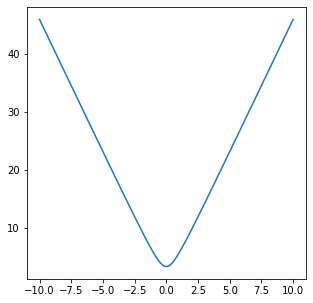

In [7]:
from numpy import linalg as nla

# the null vector
n = np.array([-4, 2, 1, 0])

# add on a multiple and check it's still a solution
mult = 1.

x_p = x_m + mult*n

print(np.allclose(d, G@x_p))


# is x_m the minimum norm solution?

# plot the norm of the vectors we get by adding on multiples of the numm vector
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

mult = np.linspace(-10,10,100)
norms = []
for m in mult:
    print
    norms.append(nla.norm(x_m + m*n))

ax1.plot(mult,norms)

# as we hoped for the norm is at a minimum when the multiplier is zero!

From which we see that if we add any multiple of the null vector to the min norm solution, the value of the norm does indeed increase.